# **MÓDULO 41** - Introducción a Machine Learning I

En este módulo, nos centraremos en la preparación y análisis de datos, que son fundamentales para el desarrollo de modelos predictivos efectivos. Exploraremos técnicas esenciales para asegurar que los datos estén listos para ser utilizados en Machine Learning.

### **Análisis Exploratorio de Datos**

Aprenderemos a realizar un análisis exhaustivo de los datos, generando estadísticas básicas, identificando datos nulos y utilizando gráficas de correlación para detectar multicolinealidad. Este paso es crucial para entender la estructura y calidad de los datos.

### **Feature Engineering**

Nos enfocaremos en mejorar la estructura de los datos mediante la eliminación de columnas irrelevantes o redundantes. Este proceso ayuda a optimizar el conjunto de datos para el modelado, asegurando que solo las características más relevantes sean utilizadas.

### **Transformación y Normalización de Datos**

Discutiremos cómo transformar variables con sesgo alto mediante logaritmos para normalizar la distribución de los datos. También abordaremos la estandarización de escalas, lo cual es esencial para mejorar la eficacia de los modelos predcitivos.

___________

## **Orden típico de un modelo de Machine Learning**

- Siempre validar si será un aprendizaje **supervisado** o **no supervisado**.
    - **Supervisado** - Análisis que se aplica a un set de datos que buscan la respuesta a una pregunta utilizando valores que ya fueron etiquetados: bueno/malo, 1/0, un rango de números. Por ejemplo un **modelo de regresión**.
    - **No supervisado** - Análisis que se aplica a un set de datos que **NO** fueron etiquetados previamente. Por ejemplo **clustering de clientes**.

### **PARTE 1 - Preparación**

- Hacer EDA (Análisis exploratorio de datos).
    > Base de cualquier modelo de Machine Learning. Se va a explorar la información y prepararla para que el científico de datos aplique los modelos necesarios.
- Análisis univariado.
- Análisis bivariado - correlación.
- Field Engineering.
- Definir porcentaje de training y testing.
- Definir los modelos que se van preliminarmente a ejecutar para entender la data.
- Split de la data.

### **PARTE 2**

- Imputación de datos.
- Balance de clases.
- Ejecutar modelo.
- Matriz de confusión.
- Validar precisión e indicadores por modelo.

_____

In [1]:
import pandas as pd
import sys
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir(r'C:\Users\danielortega\OneDrive - HOTELERA YALKUITO SA DE CV\Desktop\No Borrar Daniel\30 Data Analyst - Curso\47_Módulo_41_Introducción_Machine_Learning\archive')

df = pd.read_csv(r'C:\Users\danielortega\OneDrive - HOTELERA YALKUITO SA DE CV\Desktop\No Borrar Daniel\30 Data Analyst - Curso\47_Módulo_41_Introducción_Machine_Learning\archive\marketing_campaign.csv', sep=';')


In [2]:
df.sample(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1015,10634,1951,Master,Married,59412.0,0,0,2014-04-19,56,90,...,3,0,0,0,0,0,0,3,11,0
1742,263,1945,PhD,Single,45576.0,0,0,2014-05-28,9,56,...,8,0,0,0,0,0,0,3,11,1
1286,339,1972,PhD,Married,57091.0,0,1,2012-11-23,82,462,...,7,0,1,0,0,0,0,3,11,1
571,3526,1968,PhD,Married,38443.0,1,1,2014-01-27,58,32,...,7,0,0,0,0,0,0,3,11,0
30,6864,1989,Master,Divorced,10979.0,0,0,2014-05-22,34,8,...,5,0,0,0,0,0,0,3,11,0
2191,2656,1971,Graduation,Divorced,40851.0,1,1,2013-02-21,63,23,...,7,0,0,0,0,0,0,3,11,0
1324,6398,1974,Basic,Married,18393.0,1,0,2014-03-29,2,7,...,8,0,0,0,0,0,0,3,11,0
541,10591,1969,Graduation,Widow,43638.0,0,1,2012-08-06,37,63,...,7,0,0,0,0,0,0,3,11,0
550,4279,1963,2n Cycle,Single,39548.0,1,1,2014-03-31,87,15,...,3,0,0,0,0,0,0,3,11,0
398,798,1987,Graduation,Single,23442.0,1,0,2012-12-24,71,2,...,7,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.16,3246.66,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.81,11.98,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.25,25173.08,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.44,0.54,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.51,0.54,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.11,28.96,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.94,336.60,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.30,39.77,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.95,225.72,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.53,54.63,0.0,3.00,12.0,50.00,259.0


In [5]:
df.shape

(2240, 29)

Obtenemos los valores nulos, hacemos una suma por fila y por columnas para encontrar el valor total

In [6]:
print(f'Existen {df.isnull().sum().sum()} valores nulos en el dataset')

Existen 24 valores nulos en el dataset


In [7]:
missing_values = df.isnull().sum()
missing_values[:10]

ID                 0
Year_Birth         0
Education          0
Marital_Status     0
Income            24
Kidhome            0
Teenhome           0
Dt_Customer        0
Recency            0
MntWines           0
dtype: int64

Solo tenemos valores nulos en 'Income' y queremos conocer esos valores

In [8]:
df.loc[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,6,0,0,0,0,0,0,3,11,0


Vamos a calcular el porcentaje que representa estos datos nulos

In [9]:
total_cells = np.product(df.shape)
missing_cells = missing_values.sum()

percentage_missing = (missing_cells / total_cells) * 100
print(f'El porcentaje de datos nulos es: {percentage_missing:.2f}%')

El porcentaje de datos nulos es: 0.04%


que tan variada es cada columnas

In [10]:
df.nunique().sort_values(ascending=False)

ID                     2240
Income                 1974
MntWines                776
Dt_Customer             663
MntMeatProducts         558
MntGoldProds            213
MntFishProducts         182
MntSweetProducts        177
MntFruits               158
Recency                 100
Year_Birth               59
NumWebVisitsMonth        16
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
Marital_Status            8
Education                 5
Teenhome                  3
Kidhome                   3
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
Z_CostContact             1
Z_Revenue                 1
dtype: int64

**INSIGHTS**

- Las columnas Z_CostContact y Z_Revenue tienen los mismos valores para todos los percentiles. Debería validarse se hace sentido incluirlas o no.
- Además se valida con el comando nunique() que tienen un solo valor por lo que deben ser eliminadas.
- Se debe imputar un valor a las celdas 'Income' del dataset que tienen NaN como valor. Se debería preguntar al negocio si esta variable es crucial, ya que tal vez podrían eliminarse.
- Se asume, para el caso, que se puede imputar el promedio total del income del dataset.

____

# **Visualización Básica**

## **Análisis Univariado**



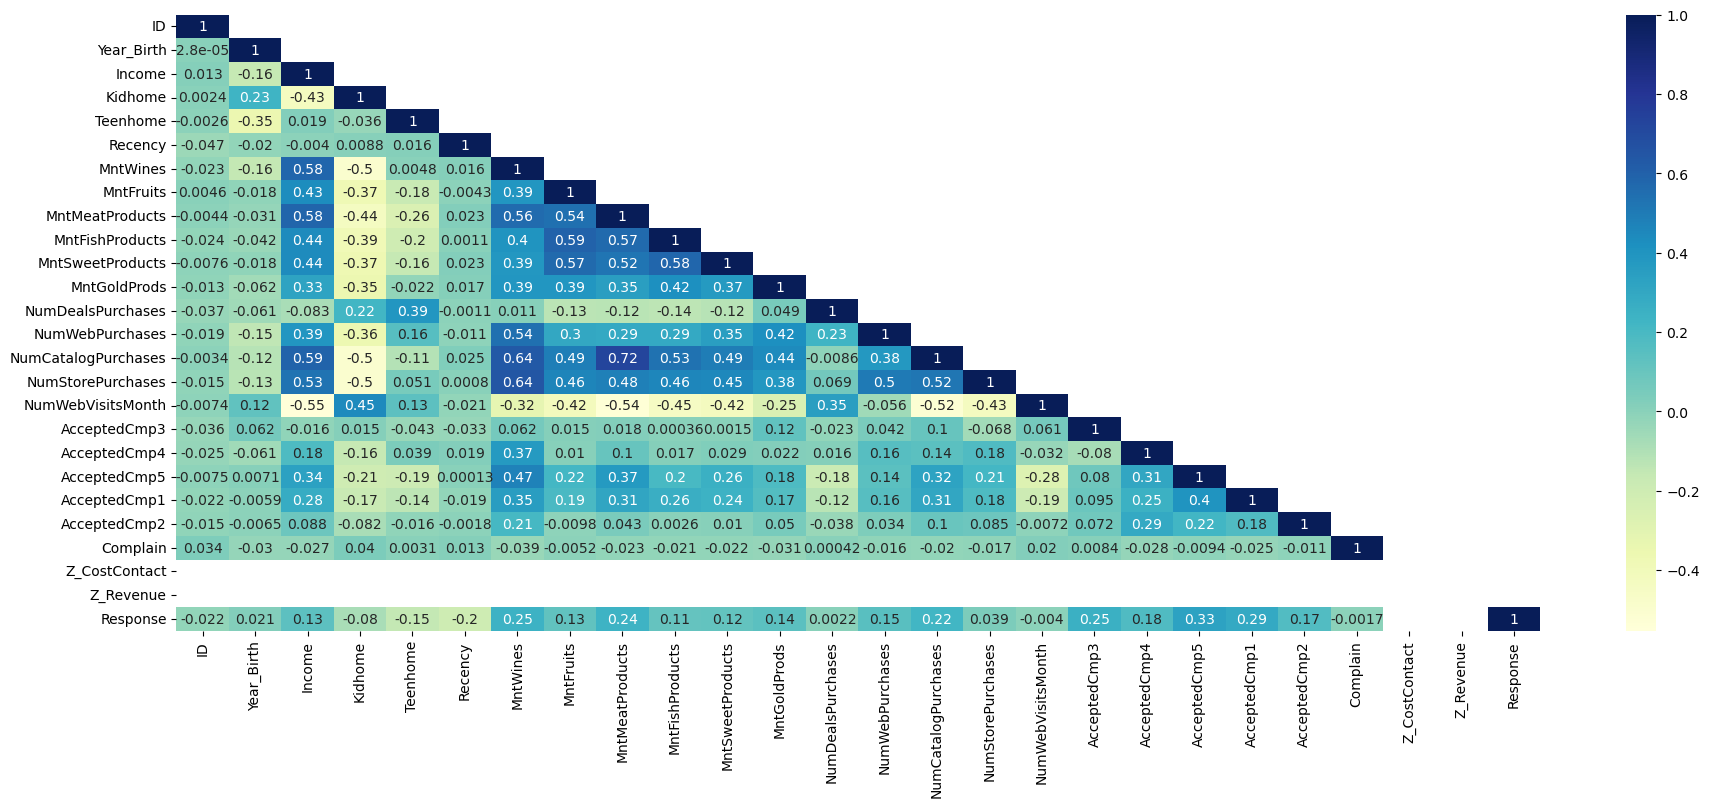

In [11]:
df_numerico = df.select_dtypes(include=['number'])

plt.figure(figsize=(22, 8))
corr_df = corr = df_numerico.corr(method='pearson')
df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(bool))
hmap= sns.heatmap(df_lt, cmap='YlGnBu', annot=True)

Visualiza las columnas y luego selecciona las columnas numéricas

In [12]:
print('Lista completa de columnas')
print('-----------------------------------')
print(df_numerico.columns)
print(len(df_numerico.columns), 'columnas en total')

Lista completa de columnas
-----------------------------------
Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')
26 columnas en total


Gráfica exploratoria de todas las columnas

IndexError: index 5 is out of bounds for axis 0 with size 5

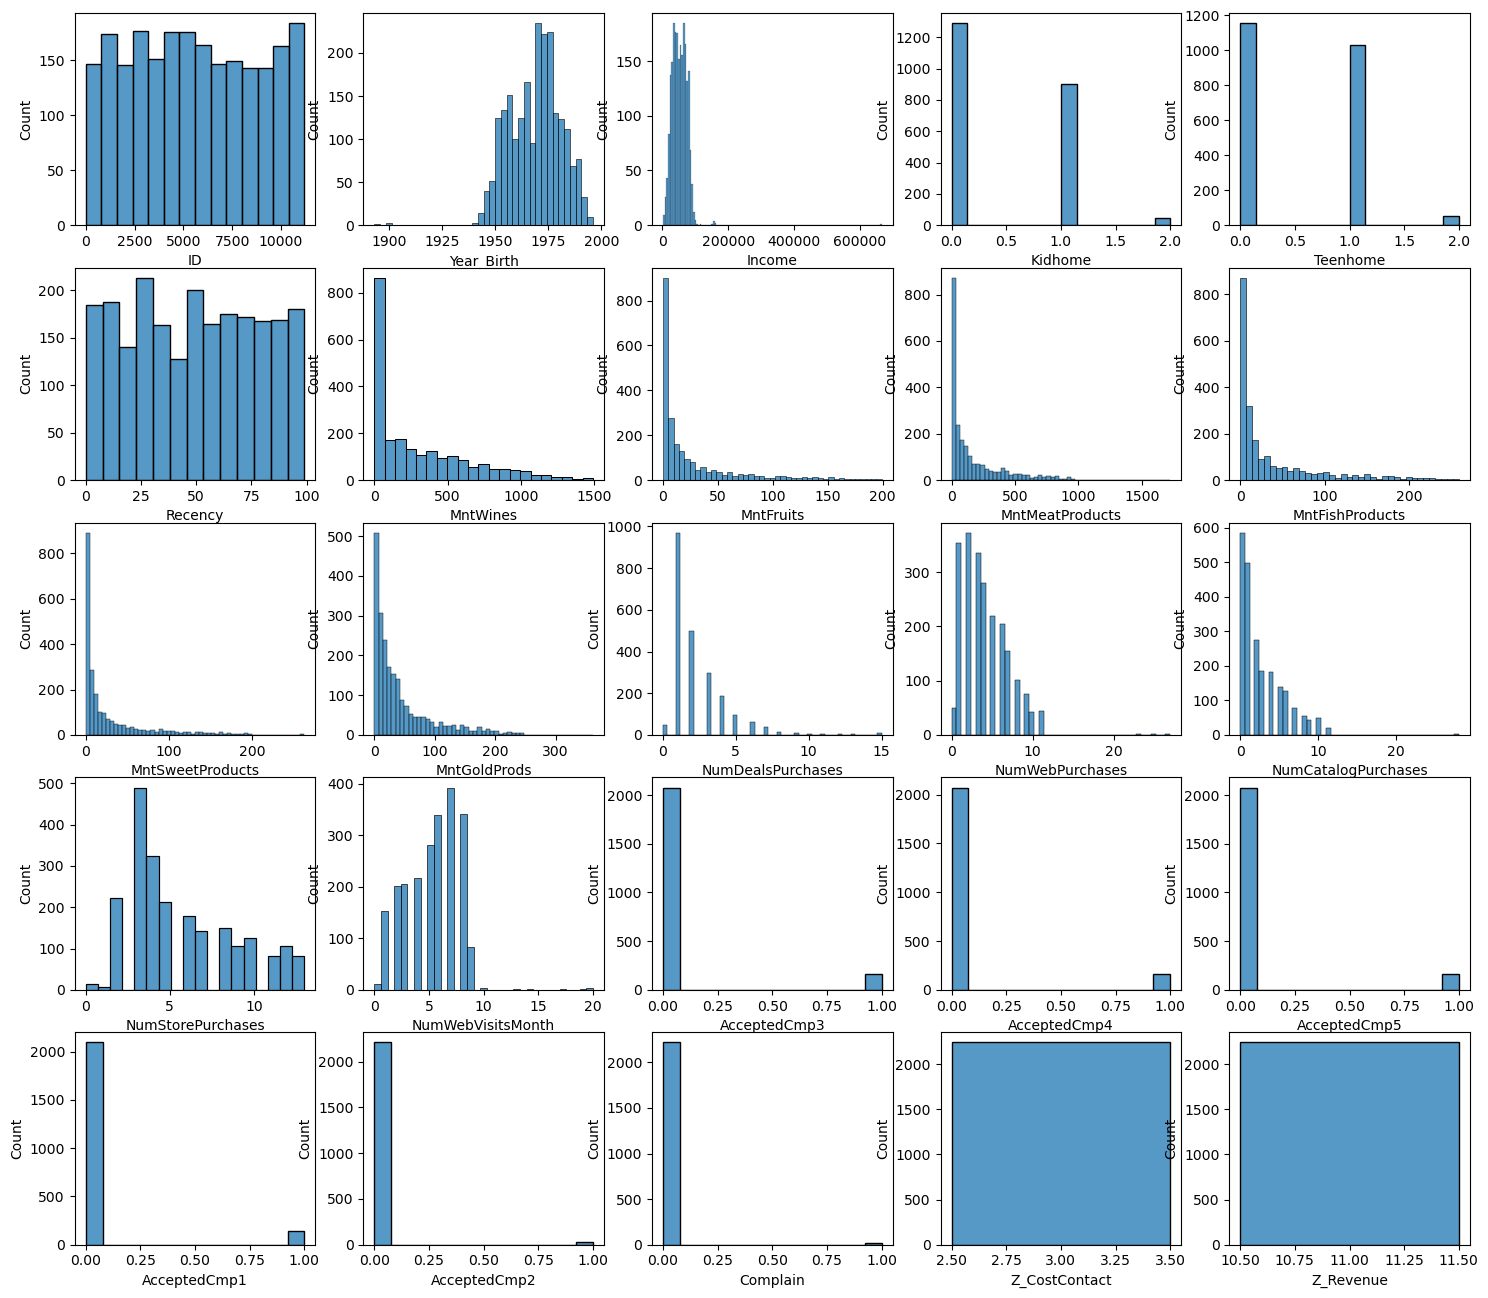

In [14]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(18,16))
for i, col in enumerate(df_numerico):
    sns.histplot(df_numerico[col],ax=axes[i//5, i%5], kde=False)

### **INSIGHTS**

- Los campos MntWines, MntFruits, Mnt en general tienen un sesgo importante hacia la derecha. Para los modelos de Machine Learning eso no ayuda en el proceso, por lo que deberíamos generar campos adicionales con su logaritmo natural, que permiten una figura menos sesgada.

- Así mismo, la clase de respuesta final(Response), se ve desbalanceada (imbalanced class).

Se buscan outliers con gráficos de box-plot

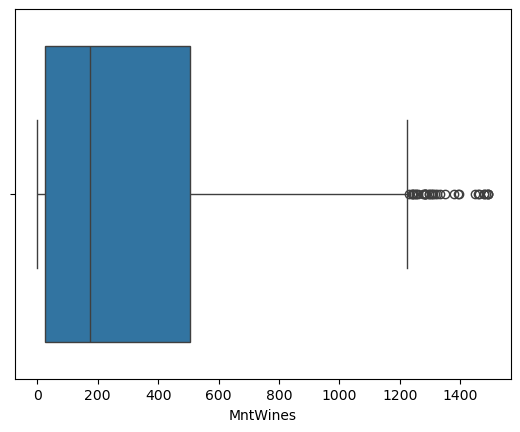

In [15]:
import seaborn as sns
ax = sns.boxplot(x=df_numerico['MntWines'])

# **Análisis Bivariado**

Se muestran los diferentes valores de las variables según el Estado Civil

Una de las variables interesantes a analizar es el estado civil = Alone y analizar por ejemplo MntMeatProducts o MntFruits

In [16]:
df.groupby('Marital_Status')[df.select_dtypes(include='number').columns].mean().T.round(2)


Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
ID,6051.5,2728.33,5427.06,5633.15,5489.24,5644.67,5969.56,5812.5
Year_Birth,1975.0,1973.00,1966.28,1969.58,1971.49,1967.75,1958.56,1973.0
Income,72365.5,43789.00,52834.23,51724.98,50995.35,53245.53,56481.55,48432.0
Kidhome,0.0,1.00,0.41,0.46,0.46,0.45,0.23,0.0
Teenhome,0.0,0.67,0.59,0.51,0.41,0.53,0.64,1.0
Recency,53.0,30.33,49.49,48.28,49.51,50.11,49.14,3.0
MntWines,355.5,184.67,324.84,299.48,288.33,306.83,369.27,322.0
MntFruits,84.5,4.00,27.43,25.73,26.84,25.35,33.09,3.0
MntMeatProducts,312.5,26.33,150.21,160.68,182.11,168.10,189.29,50.0
MntFishProducts,205.5,7.67,35.04,35.38,38.22,38.99,51.39,4.0


In [17]:
df.groupby('Response')[df.select_dtypes(include='number').columns].mean().T.round(2)

Response,0,1
ID,5622.01,5421.82
Year_Birth,1968.70,1969.42
Income,50839.13,60209.68
Kidhome,0.46,0.34
Teenhome,0.54,0.31
Recency,51.51,35.38
MntWines,269.10,502.70
MntFruits,24.22,38.20
MntMeatProducts,144.62,294.35
MntFishProducts,34.98,52.05


_______________

# **Field Engineering**

- Se refiere a los distintos pasos que se deben tomar para dejar más limpio y preparado el dataset para el modelo.
- Eliminar las columnas con un solo valor: Z_Costcontact y Z_Revenue.
- Eliminar las líneas con nulos.
- Cambiar el tipo de dato de la columna Education y Marital_Status

Eliminación de columnas

In [18]:
df.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

In [19]:
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
1075,6421,1961,Graduation,Together,88347.0,0,0,2013-07-03,32,1050,...,7,9,1,0,0,0,1,0,0,0
1346,10390,1959,2n Cycle,Married,26887.0,0,1,2013-02-10,27,6,...,0,3,6,0,0,0,0,0,0,0
1985,8619,1957,Graduation,Together,21994.0,0,1,2012-12-24,4,9,...,0,3,5,0,0,0,0,0,0,0
218,1377,1954,Master,Widow,44551.0,0,1,2013-08-31,24,182,...,1,5,7,0,0,0,0,0,0,0
1169,2410,1969,Graduation,Single,81657.0,0,0,2014-01-22,69,364,...,4,8,1,0,0,0,0,0,0,0


Validación de nulos

In [20]:
df.loc[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,0,2,7,0,0,0,0,0,0,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,0,0,1,0,0,0,0,0,0,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,3,4,2,0,0,0,0,0,0,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,1,4,6,0,0,0,0,0,0,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,0,3,6,0,0,0,0,0,0,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,0,3,8,0,0,0,0,0,0,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,2,8,9,0,0,0,0,0,0,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,0,2,7,0,0,0,0,0,0,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,4,8,1,0,0,0,0,0,0,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,1,7,6,0,0,0,0,0,0,0


In [21]:
avg_mean = df['Income'].mean()
df = df.replace({'Income': {np.nan: avg_mean}})

In [22]:
df.loc[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


In [23]:
print(f'Existen {df.isnull().sum().sum()} valores nulos en el dataset')

Existen 0 valores nulos en el dataset


**Cambio de columnas a categorías**

In [25]:
print(df['Marital_Status'].unique())
print(df['Education'].unique())

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


In [26]:
df['Marital_Status'] = df['Marital_Status'].astype('category')
df['Education'] = df['Education'].astype('category')

In [ ]:
df.dtypes

ID                        int64
Year_Birth                int64
Education              category
Marital_Status         category
Income                  float64
Kidhome                   int64
Teenhome                  int64
Dt_Customer              object
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Response                  int64
dtype: object

______

# **Preparación final antes de split**

- Eliminar columnas con alta correlación
- Generar clases para imbalances internos
- Eliminar el ID (no va a ser relevante en la predicción)

In [29]:
df2 = df.copy()